<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/6_Berkeley_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Berkeley Crime Dataset.

We will do exploratory data analysis on this dataset. We will also use this dataset for trying out the pandas functionalities and techniques in the class.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Loading the dataset 

The data for 2020 is at: 
https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5

The description of the dataset is at:

https://data.cityofberkeley.info/api/views/k2nh-s5h5/files/tgCx9-LwzyULzas6ZSxGdPmc1f-0euS2Y6EVOrNH940?download=true&filename=01_Page_Narrative_Crime.pdf


In [ ]:
url = 'https://data.cityofberkeley.info/api/views/k2nh-s5h5/rows.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,20091947,BURGLARY AUTO,10/22/2020 12:00:00 AM,7:45,BURGLARY - VEHICLE,4,01/21/2022 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1,21006333,FRAUD/FORGERY,02/02/2021 12:00:00 AM,9:00,FRAUD,2,11/29/2029 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
2,21003968,ROBBERY,01/29/2021 12:00:00 AM,20:45,ROBBERY,5,02/20/2030 12:00:00 AM,"2900 BLOCK SAN PABLO AVE\nBerkeley, CA\n(37.85...",2900 BLOCK SAN PABLO AVE,Berkeley,CA
3,20046519,DISTURBANCE,10/07/2020 12:00:00 AM,13:00,DISORDERLY CONDUCT,3,11/13/2023 12:00:00 AM,"2500 BLOCK TELEGRAPH AVE\nBerkeley, CA\n(37.86...",2500 BLOCK TELEGRAPH AVE,Berkeley,CA
4,20051865,BURGLARY RESIDENTIAL,11/09/2020 12:00:00 AM,19:08,BURGLARY - RESIDENTIAL,1,11/14/2024 12:00:00 AM,"2400 BLOCK DWIGHT WAY\nBerkeley, CA\n(37.86482...",2400 BLOCK DWIGHT WAY,Berkeley,CA


In [ ]:
len(df)

2552

In [ ]:
df.shape

(2552, 11)

In [ ]:
df.isnull().sum()

CASENO             0
OFFENSE            0
EVENTDT            0
EVENTTM            0
CVLEGEND           0
CVDOW              0
InDbDate           0
Block_Location     0
BLKADDR           20
City               0
State              0
dtype: int64

In [ ]:
df[["Block_Location", "BLKADDR"]]

,Block_Location,BLKADDR
0,"Berkeley, CA\n(37.869058, -122.270455)",NaN
1,"Berkeley, CA\n(37.869058, -122.270455)",NaN
2,"2900 BLOCK SAN PABLO AVE\nBerkeley, CA\n(37.85...",2900 BLOCK SAN PABLO AVE
3,"2500 BLOCK TELEGRAPH AVE\nBerkeley, CA\n(37.86...",2500 BLOCK TELEGRAPH AVE
4,"2400 BLOCK DWIGHT WAY\nBerkeley, CA\n(37.86482...",2400 BLOCK DWIGHT WAY
...,...,...
2547,"1300 BLOCK ROSE ST\nBerkeley, CA\n(37.876897, ...",1300 BLOCK ROSE ST
2548,"1200 BLOCK ASHBY AVE\nBerkeley, CA\n(37.852211...",1200 BLOCK ASHBY AVE
2549,"1900 BLOCK 8TH ST\nBerkeley, CA\n(37.869617, -...",1900 BLOCK 8TH ST
2550,"1100 BLOCK UNIVERSITY AVE\nBerkeley, CA\n(37.8...",1100 BLOCK UNIVERSITY AVE


## Columns



In [ ]:
df.columns

Index(['CASENO', 'OFFENSE', 'EVENTDT', 'EVENTTM', 'CVLEGEND', 'CVDOW',
       'InDbDate', 'Block_Location', 'BLKADDR', 'City', 'State'],
      dtype='object')

In [ ]:
df.Block_Location

0                  Berkeley, CA\n(37.869058, -122.270455)
1                  Berkeley, CA\n(37.869058, -122.270455)
2       2900 BLOCK SAN PABLO AVE\nBerkeley, CA\n(37.85...
3       2500 BLOCK TELEGRAPH AVE\nBerkeley, CA\n(37.86...
4       2400 BLOCK DWIGHT WAY\nBerkeley, CA\n(37.86482...
                              ...                        
2547    1300 BLOCK ROSE ST\nBerkeley, CA\n(37.876897, ...
2548    1200 BLOCK ASHBY AVE\nBerkeley, CA\n(37.852211...
2549    1900 BLOCK 8TH ST\nBerkeley, CA\n(37.869617, -...
2550    1100 BLOCK UNIVERSITY AVE\nBerkeley, CA\n(37.8...
2551    2900 BLOCK TELEGRAPH AVE\nBerkeley, CA\n(37.85...
Name: Block_Location, Length: 2552, dtype: object

In [ ]:
df.City.unique()

array(['Berkeley'], dtype=object)

## Categorical variables

Convert the days of the week to a categorical variable

In [ ]:
df["DAY"] = df.CVDOW.map({ 0 : "Sunday", 1 : "Monday", 2 : "Tuesday", 3
: "Wednesday",  4 : "Thursday", 5 : "Friday", 6 : "Saturday"}).astype("category")


In [ ]:
df["DAY"]

0        Thursday
1         Tuesday
2          Friday
3       Wednesday
4          Monday
          ...    
2547    Wednesday
2548     Thursday
2549     Saturday
2550      Tuesday
2551      Tuesday
Name: DAY, Length: 2552, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']

## Pivot table

We can summarize the number of crime events for each day of the week.

In [ ]:
df.columns

Index(['CASENO', 'OFFENSE', 'EVENTDT', 'EVENTTM', 'CVLEGEND', 'CVDOW',
       'InDbDate', 'Block_Location', 'BLKADDR', 'City', 'State', 'DAY'],
      dtype='object')

In [ ]:
df.pivot_table(values = "CASENO", index = 'DAY', columns = 'CVLEGEND', aggfunc = 'count')

CVLEGEND,ALL OTHER OFFENSES,ARSON,ASSAULT,BURGLARY - COMMERCIAL,BURGLARY - RESIDENTIAL,BURGLARY - VEHICLE,DISORDERLY CONDUCT,DRUG VIOLATION,FAMILY OFFENSE,FRAUD,HOMICIDE,LARCENY,LARCENY - FROM VEHICLE,LIQUOR LAW VIOLATION,MISSING PERSON,MOTOR VEHICLE THEFT,RECOVERED VEHICLE,ROBBERY,SEX CRIME,VANDALISM,WEAPONS OFFENSE
DAY,,,,,,,,,,,,,,,,,,,,,
Friday,1.0,7.0,24.0,16.0,37.0,26.0,28.0,7.0,10.0,24.0,NaN,112.0,21.0,4.0,6.0,30.0,NaN,12.0,4.0,19.0,4.0
Monday,NaN,4.0,22.0,6.0,22.0,17.0,26.0,1.0,14.0,20.0,NaN,127.0,28.0,2.0,6.0,18.0,NaN,13.0,2.0,27.0,3.0
Saturday,NaN,6.0,19.0,16.0,24.0,25.0,21.0,6.0,12.0,7.0,1.0,126.0,21.0,8.0,3.0,33.0,1.0,14.0,4.0,26.0,4.0
Sunday,1.0,NaN,18.0,19.0,18.0,21.0,31.0,4.0,21.0,7.0,NaN,113.0,15.0,1.0,4.0,30.0,NaN,12.0,5.0,23.0,7.0
Thursday,NaN,NaN,13.0,12.0,29.0,31.0,29.0,3.0,8.0,23.0,NaN,113.0,23.0,1.0,3.0,35.0,1.0,8.0,3.0,23.0,7.0
Tuesday,NaN,NaN,19.0,17.0,24.0,15.0,26.0,3.0,8.0,19.0,NaN,121.0,20.0,2.0,2.0,29.0,NaN,15.0,1.0,23.0,4.0
Wednesday,NaN,5.0,18.0,12.0,29.0,22.0,25.0,4.0,12.0,13.0,NaN,103.0,23.0,3.0,6.0,38.0,1.0,17.0,3.0,22.0,6.0


In [ ]:
day_crime_table = df.pivot_table(values = "CASENO",
                                 columns = 'DAY',
                                 index = 'CVLEGEND',
                                 aggfunc = 'count',
                                 margins = True)
day_crime_table

DAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
CVLEGEND,,,,,,,,
ALL OTHER OFFENSES,1.0,NaN,NaN,1.0,NaN,NaN,NaN,2
ARSON,7.0,4.0,6.0,NaN,NaN,NaN,5.0,22
ASSAULT,24.0,22.0,19.0,18.0,13.0,19.0,18.0,133
BURGLARY - COMMERCIAL,16.0,6.0,16.0,19.0,12.0,17.0,12.0,98
BURGLARY - RESIDENTIAL,37.0,22.0,24.0,18.0,29.0,24.0,29.0,183
BURGLARY - VEHICLE,26.0,17.0,25.0,21.0,31.0,15.0,22.0,157
DISORDERLY CONDUCT,28.0,26.0,21.0,31.0,29.0,26.0,25.0,186
DRUG VIOLATION,7.0,1.0,6.0,4.0,3.0,3.0,4.0,28
FAMILY OFFENSE,10.0,14.0,12.0,21.0,8.0,8.0,12.0,85


We can now sort by the rows that have the highest values.

In [ ]:
day_crime_table.sort_values(by="All", ascending=False)

DAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
CVLEGEND,,,,,,,,
All,392.0,358.0,377.0,350.0,365.0,348.0,362.0,2552
LARCENY,112.0,127.0,126.0,113.0,113.0,121.0,103.0,815
MOTOR VEHICLE THEFT,30.0,18.0,33.0,30.0,35.0,29.0,38.0,213
DISORDERLY CONDUCT,28.0,26.0,21.0,31.0,29.0,26.0,25.0,186
BURGLARY - RESIDENTIAL,37.0,22.0,24.0,18.0,29.0,24.0,29.0,183
VANDALISM,19.0,27.0,26.0,23.0,23.0,23.0,22.0,163
BURGLARY - VEHICLE,26.0,17.0,25.0,21.0,31.0,15.0,22.0,157
LARCENY - FROM VEHICLE,21.0,28.0,21.0,15.0,23.0,20.0,23.0,151
ASSAULT,24.0,22.0,19.0,18.0,13.0,19.0,18.0,133


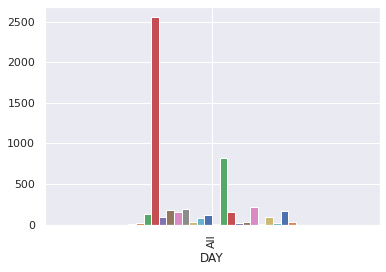

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
day_crime_table.pivot_table( "All",columns= "CVLEGEND").plot(kind="bar", legend=None)



## Dealing with datetime

In [ ]:
from datetime import datetime


In [ ]:
pd.to_datetime(df["EVENTDT"])

We can assign it back to the same column name.  We have converted a string type column to a datetime column.

In [ ]:
df["EVENTDT"].dtype

In [ ]:
df["EVENTDT"] = pd.to_datetime(df["EVENTDT"])

In [ ]:
df["EVENTDT"]

We can calculate the number of days between the event of the crime and the date in the database.  To do that let us convert the other date entry in the dataframe to a date type.

In [ ]:
df["InDbDate"] = pd.to_datetime(df["InDbDate"])


In [ ]:
df["InDbDate"]

Now we can calculate the difference between the dates as a time delta, and generate some statistics on it too.

In [ ]:
old_date = pd.to_datetime("2020-01-31")
new_date = pd.to_datetime("2021-01-31 10:30:00")
print(new_date, old_date)
new_date

In [ ]:
new_date - old_date

In [ ]:
(df["InDbDate"] - df["EVENTDT"]).agg(["min","max"])

In [ ]:
df["InDbDate"].agg(["min","max"])

## Dealing with duplicates

There are two offense columns `CVLEGEND` and `OFFENSE`.  Let us explore this a bit.

In [ ]:
df.CVLEGEND.unique()

In [ ]:
df.CVLEGEND.nunique()

In [ ]:
# Recall that a column can be accessed by either the . notation or the [] notation.
# the . notation can be used only when column names do not have a space or other special characters.

df["OFFENSE"].unique()

In [ ]:
df["OFFENSE"].nunique()

Some of the `OFFENSE` types probably fall in the same category. Let us subset the two columns into a smaller dataset to see if we can simplify.

In [ ]:
# Remember that df["column name"] gives us just that column as a series object
df["OFFENSE"]

In [ ]:
# df[[col1, col2]] is a subset of columns selected.  This gives us a dataframe with two columns.

offense_df = df[ ["OFFENSE", "CVLEGEND"] ]
offense_df

In [ ]:
len(offense_df)

### `unique` and `duplicated`

`unique()` worked for Series, but there is no equivalent in a dataframe. Instead  we will use `duplicated()` for a dataframe.

`duplicated()` will also work for Series.

In [ ]:
offense_df.unique()

In [ ]:
s = pd.Series([1, 2, 1, 2, 3, 1, 2, 3])
s.duplicated()

In [ ]:
~s.duplicated()

In [ ]:
s[~s.duplicated()]

In [ ]:
# duplicated returnsa boolean series
offense_df.duplicated()


Recall that when we were filtering/subsetting Series or Dataframe, we used the boolean series to obtain the subset.

Notice that the first occurence of a value is marked as `False` and the duplicated occurence is marked as `True`.  So we want the negation of the filtering.


In [ ]:
offense_df[~offense_df.duplicated()]

Another simpler option is to use `drop_duplicates()`.\
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [ ]:
offense_df.drop_duplicates()

In [ ]:
len(offense_df)

In [ ]:
len(offense_df.drop_duplicates())

In [ ]:
simplified_offenses = offense_df.drop_duplicates()
simplified_offenses[simplified_offenses.duplicated("CVLEGEND", keep = "last")]# first : Mark duplicates as True except for the first occurrence.

# last : Mark duplicates as True except for the last occurrence.

# False : Mark all duplicates as True.

Among these, how often does LARCENY occur in the data?  What is the most common OFFENSE for LARCENY? These are a bit difficult to accomplish using the methods we have discussed so far. We will look at some other methods for answering question in the next few classes.

# Groupby

Exercises for the Berkeley dataset

1. How many events (of any kind) have occured on different days of the week?
2. `CVLEGEND` has 21 kinds of crimes. How many events (`CVLEGEND`) of each kind have occured?
3. Pick the crime type that is most common. How many events of this kind occur on different days of the week?
4. How many events of any kind have happened on different days of the week? (this can have upto 21x7 groups for 21 crime types and 7 days of the week.)
5. Last week we created offense_df. This was a subset of `CVLEGEND` and `OFFENSE` columns. There are 28 `OFFENSE` types and 21 `CVLEGEND` types. How many offenses of each kind are listed per `CVLEGEND` type?

In [ ]:
# 1. Number of events per day of the week.
df.groupby("DAY")['CASENO'].count()

Groupby has a `plot()` method. The default is a line graph.

In [ ]:
df.groupby("DAY")['CASENO'].count().plot()

We can get a bar graph using the `kind = "bar"` argument.

In [ ]:
df.groupby("DAY")['CASENO'].count().plot(kind = "bar")
# Use ylim to limit the y-axis range.

In [ ]:
# 2. Number of events for each Crime type.

df.groupby("CVLEGEND")["CASENO"].count()

In [ ]:
# We can get the same data from the smaller offense_df dataframe too.

offense_df.groupby("CVLEGEND").count()

In [ ]:
# 3. `LARCENY` is the crime with the most number of events.
# We will get the number of events per day.
larceny_df = df[df["CVLEGEND"] == "LARCENY"]
larceny_df.groupby("DAY")["CASENO"].count()

In [ ]:
lar_as_df = df[(df["CVLEGEND"] == "LARCENY") | (df["CVLEGEND"] == "ASSAULT")]
lar_as_df

In [ ]:
lar_as_df.groupby(["DAY", "CVLEGEND"])['CASENO'].count().to_frame().unstack().plot(kind="bar",stacked=True)

In [ ]:
# 4.
df.groupby(["DAY", "CVLEGEND"])["CASENO"].count()

In [ ]:
# 5. 
offense_df.groupby(["CVLEGEND","OFFENSE"]).count()
# df[["CVLEGEND","OFFENSE"]].groupby(["CVLEGEND","OFFENSE"]).count()

## String split

### Split in python

In [ ]:
s = "This is a very long sentence that we will break up. This one has a    lot   of  spaces  .    "

In [ ]:
# split() will split with the `space` character.
s.split()

In [ ]:
# You can split with any character.
s.split(".")

In [ ]:
# notice that the character used to split is not in the result.
s.split("a")

### String split in Pandas

In [ ]:
s = pd.Series(["Three word sentence",
               "Another such sentence",
               "Third sentence too"])

In [ ]:
s.str.split()

In [ ]:
split_s = s.str.split()
print(type(split_s))


How to retrieve only the last element of the lists?

`split_s[1]` returns the 1th element of the series.  It does not "broadcast" the `[1]` for the elements of the list. 

In [ ]:
split_s[1]

In [ ]:
print(type(split_s[1]))

In [ ]:
split_s

In [ ]:
split_s.str[1]

In [ ]:
split_s.str[-1]

In [ ]:
split_s.str.get(-1)

**Exercise**

Split a series of date values in DD/MM/YYYY format into year, month and date.  Retrieve only the year.

In [ ]:
s = pd.Series(['01/01/2001', '03/12/2020', '10/10/2012', '11/9/2017'])

In [ ]:
date = s.str.split('/')
date.str.get(-1)


### Join strings


In [ ]:
"--".join(['a', 'b', 'c'])

In [ ]:
"".join(['a', 'b', 'c'])

Let us look at one entry for block address. 
- We want to extract out Lattitude and Longitude.  
- We want to discard "Berkeley, CA"
- `s.split()` is not good enough. It includes the leading opening parenthesis and the ending closing parenthesis, comma etc.

In [ ]:
s = '2100 SHATTUCK AVE\nBerkeley, CA\n(37.871167, -122.268285)'

In [ ]:
s.split()

In [ ]:
import re

In [ ]:
a = re.split(r'[()]', s)

In [ ]:
a[1]


In [ ]:
l= re.split(r',',a[1])

In [ ]:
l[0]

In [ ]:
address = "535 Pierce street\nAlbany CA\n95011"

In [ ]:
print(address)

Here we provide a *regular expression* to be matched for our splitting.  Split whenever you find a `(` or a `)`.

How do we split based on 

In [ ]:
s = "a+b*c-d,e/f,g"        

In [ ]:
re.split(r'[+,\-\*\/]',s)

In [ ]:
txt = "I have a pet in petaluma"
x = re.findall("pet", txt)
print(x)

In [ ]:
df_date=df["EVENTDT"].str.split()

In [ ]:
df_date_only=df_date.str[0]

In [ ]:
df_date_only

In [ ]:
df['df_date_only']=df_date_only


In [ ]:
df['df_date_only'].head()

In [ ]:
head_df = df.head(20)

In [ ]:
latlong = head_df['Block_Location'].str.split(r'[()]').str.get(1)


In [ ]:
latlong

In [ ]:
head_df['lattitude'] = latlong.str.split(',').str.get(0)
head_df['longitude'] = latlong.str.split(',').str.get(1)

In [ ]:
head_df['Block_Location'].str.split(r'[()]')

In [ ]:
head_df